In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import load_model

In [2]:
model=load_model("LSTM_model.keras")

In [3]:
df=pd.read_csv(".\Microsoft.csv")
df1=df['close']

scaler=MinMaxScaler(feature_range=(0,1))

df1=np.array(df1)
df1=df1.reshape(-1,1)
df1=scaler.fit_transform(df1)

train_size=int(len(df1)*0.75)
test_size=len(df1)-train_size

train_data=df1[0:train_size]
test_data=df1[train_size:]

In [4]:
print(df['date'][train_size+200+1])#step
print(df['date'][len(df)-1])

2016-11-29
2021-01-29


In [5]:
def seq(data,step):
    x,y=[],[]
    for i in range(0,len(data)-1-step):
        xi=data[i:(i+step),0]
        x.append(xi)
        yi=data[i+step,0]
        y.append(yi)
    return np.array(x),np.array(y)

In [6]:
step=200
x_train, y_train=seq(train_data,step)
x_test, y_test=seq(test_data,step)

In [7]:
r,c=x_train.shape
x_train=x_train.reshape(r,c,1)
r2,c2=x_test.shape
x_test=x_test.reshape(r2,c2,1)

In [8]:
test_pred=model.predict(x_test)

33/33 [==============================] - 7s 131ms/step


In [9]:
test_pred=scaler.inverse_transform(test_pred)

In [10]:
print(type(test_pred))
print(test_pred.shape)

<class 'numpy.ndarray'>
(1049, 1)


In [11]:
y_test=y_test.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)

In [12]:
print("Testing Data Root Mean Squared Error : ",math.sqrt(mean_squared_error(y_test,test_pred)))

Testing Data Root Mean Squared Error :  4.148710368847288


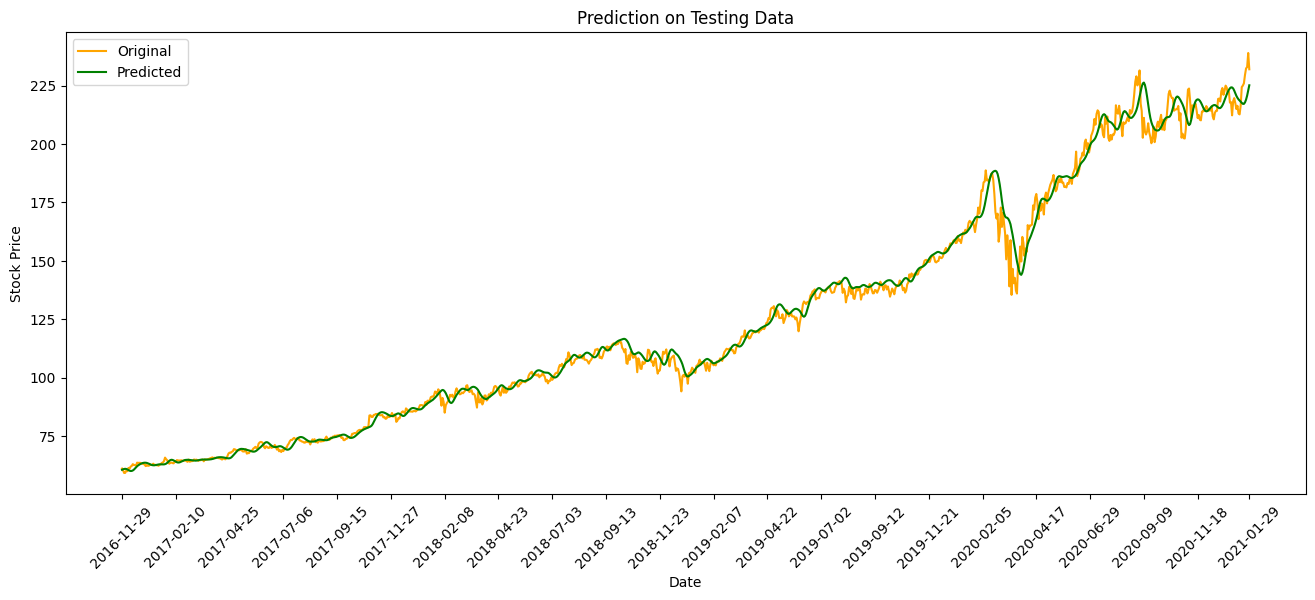

In [44]:
dates=np.array(df['date'])
dates=dates[-(len(y_test)):]
plt.plot(dates,scaler.inverse_transform(test_data[-(len(y_test)):]),label='Original',color="orange")
plt.plot(test_pred,label='Predicted',color='green')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title("Prediction on Testing Data")

myarr=np.arange(0,len(test_pred),50)
myarr=np.append(myarr,1048)
plt.xticks(myarr,rotation=45)

plt.rcParams['figure.figsize']=(16,6)
plt.show()

In [14]:
diff=abs(y_test-test_pred)

In [15]:
rmse=math.sqrt(np.mean(diff**2))

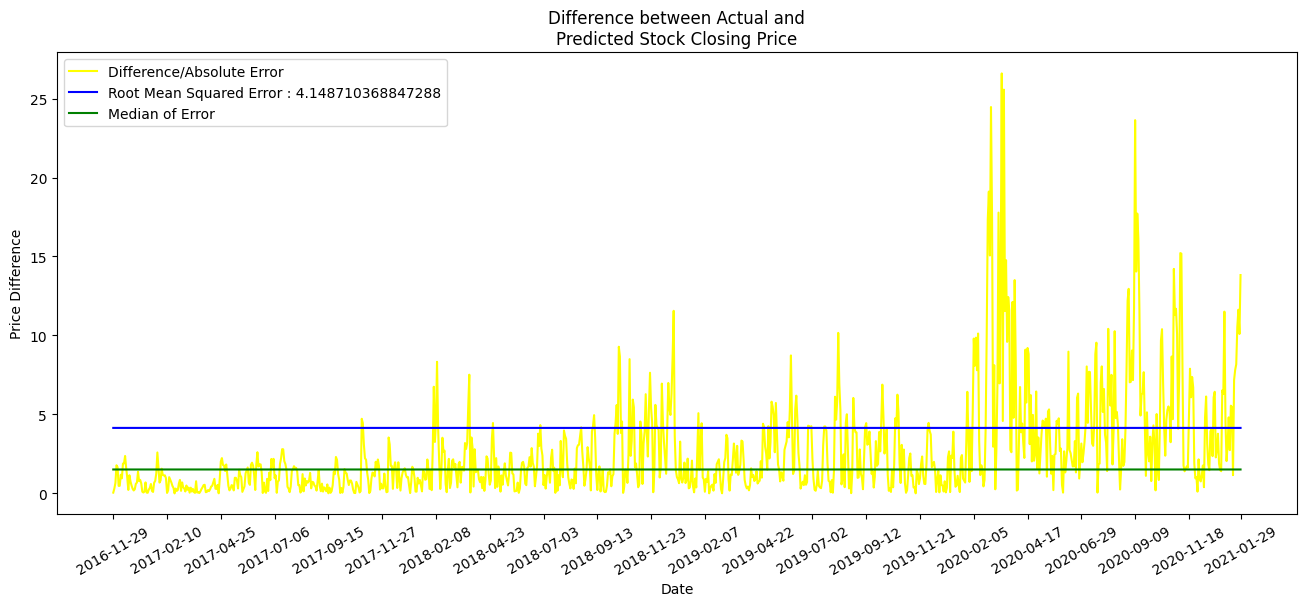

In [16]:
dates=np.array(df['date'])
dates=dates[-(len(y_test)):]

plt.plot(dates,diff,label="Difference/Absolute Error",color="yellow")

rmse=np.full_like(dates,rmse)
plt.plot(dates,rmse,label="Root Mean Squared Error : "+str(rmse[0]),color="blue")

med=np.median(diff)
med=np.full_like(dates,med)
plt.plot(dates,med,label="Median of Error",color="green")

plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.title("Difference between Actual and\nPredicted Stock Closing Price")

myarr=np.arange(0,len(test_pred),50)
myarr=np.append(myarr,1048)
plt.xticks(myarr,rotation=30)

plt.rcParams['figure.figsize']=(16,6)
plt.show()

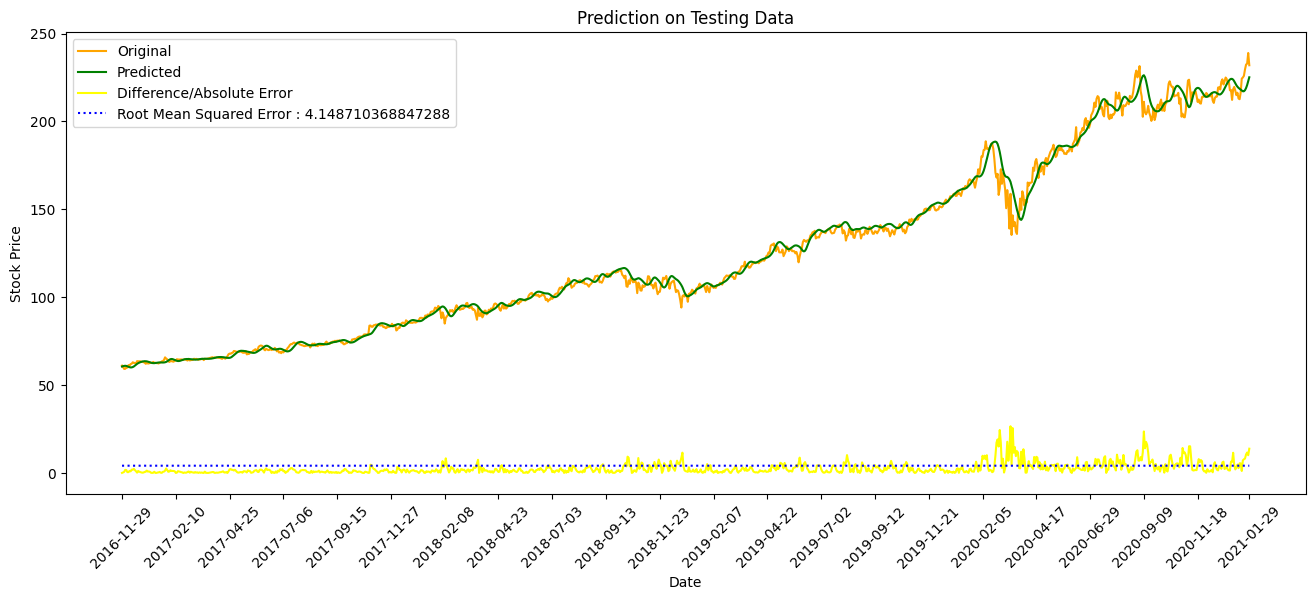

In [17]:
dates=np.array(df['date'])[-(len(y_test)):]
plt.plot(dates,scaler.inverse_transform(test_data[-(len(y_test)):]),label='Original',color="orange")
plt.plot(test_pred,label='Predicted',color='green')
plt.plot(dates,diff,label="Difference/Absolute Error",color="yellow")
plt.plot(dates,rmse,label="Root Mean Squared Error : "+str(rmse[0]),color="blue",linestyle="dotted")

plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title("Prediction on Testing Data")

myarr=np.arange(0,len(test_pred),50)
myarr=np.append(myarr,1048)
plt.xticks(myarr,rotation=45)

plt.rcParams['figure.figsize']=(16,6)
plt.show()

In [18]:
#Prediction on Training Data
train_pred=model.predict(x_train)

111/111 [==============================] - 15s 133ms/step


In [19]:
train_pred=scaler.inverse_transform(train_pred)

In [20]:
y_train=y_train.reshape(-1,1)
y_train=scaler.inverse_transform(y_train)

In [21]:
print("Training Data Root Mean Squared Error : ",math.sqrt(mean_squared_error(y_train,train_pred)))

Training Data Root Mean Squared Error :  0.9969097175773267


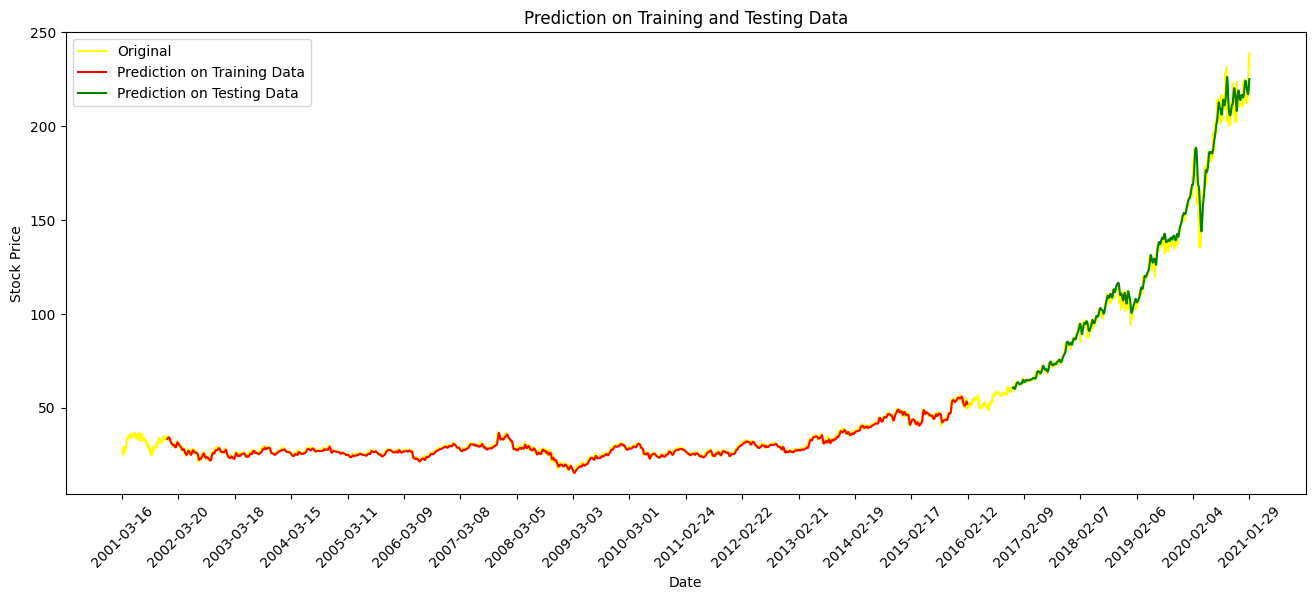

In [22]:
dates=np.array(df['date'])
plt.plot(df['date'],df['close'],label='Original',color="yellow")
# plt.plot(test_pred,label='Predicted')

dates1=dates[step:step+len(y_train)]
plt.plot(dates1,train_pred,label='Prediction on Training Data',color="red")

dates2=dates[-len(y_test):]
plt.plot(dates2,test_pred,label='Prediction on Testing Data',color="green")


plt.legend(loc='upper left')
plt.xlabel("Date")
plt.ylabel('Stock Price')
plt.title("Prediction on Training and Testing Data")

myarr=np.arange(0,len(df),250)
myarr=np.append(myarr,len(df)-1)

plt.xticks(myarr,rotation=45)
plt.rcParams['figure.figsize']=(16,6)
plt.show()

In [23]:
#Prediction for 100 days
df2=df[['date','close']][-250:]

In [24]:
print(df2)

            date      close
4750  2020-02-04  180.12000
4751  2020-02-05  179.89999
4752  2020-02-06  183.63000
4753  2020-02-07  183.89000
4754  2020-02-10  188.70000
...          ...        ...
4995  2021-01-25  229.53000
4996  2021-01-26  232.33000
4997  2021-01-27  232.89999
4998  2021-01-28  238.92999
4999  2021-01-29  231.96001

[250 rows x 2 columns]


In [25]:
nidx=np.arange(0,250,1)
df2.set_index(nidx)

,date,close
0,2020-02-04,180.12000
1,2020-02-05,179.89999
2,2020-02-06,183.63000
3,2020-02-07,183.89000
4,2020-02-10,188.70000
...,...,...
245,2021-01-25,229.53000
246,2021-01-26,232.33000
247,2021-01-27,232.89999
248,2021-01-28,238.92999


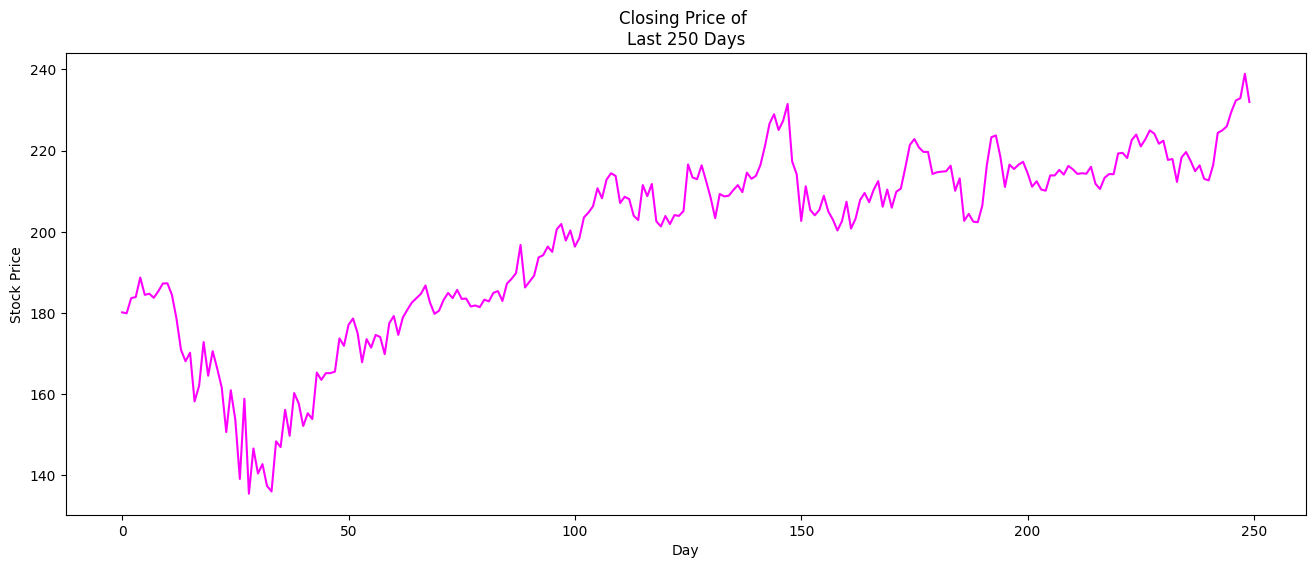

In [26]:
indx=np.arange(0,250,1)
plt.plot(indx,df2['close'],color="magenta")
plt.xlabel('Day')
plt.ylabel("Stock Price")
plt.title("Closing Price of \nLast 250 Days")
plt.rcParams['figure.figsize']=(16,6)
plt.show()

In [27]:
dfp1=df['close']

In [28]:
type(dfp1)

pandas.core.series.Series

In [29]:
dfp1=np.array(dfp1)

In [30]:
print(dfp1)
print(dfp1.shape)

[ 27.28125  27.15625  26.34375 ... 232.89999 238.92999 231.96001]
(5000,)


In [31]:
dfp1=dfp1.reshape(-1,1)
dfp1=scaler.fit_transform(dfp1)

In [32]:
print(dfp1)
print(dfp1[-1])

[[0.05421061]
 [0.05365203]
 [0.05002123]
 ...
 [0.97305389]
 [1.        ]
 [0.96885343]]
[0.96885343]


In [33]:
dfp1=dfp1[-step:]

In [34]:
dfp1=dfp1.reshape(1,-1)
print(dfp1)
print(dfp1.shape)

[[0.72343372 0.73040494 0.71458579 0.68223262 0.70770403 0.69831981
  0.71230676 0.71007242 0.69112524 0.7251765  0.73313083 0.71239618
  0.73147738 0.74005719 0.74801143 0.75274831 0.75757439 0.76677995
  0.74787737 0.73554387 0.73902944 0.75078205 0.75860223 0.75288233
  0.76195374 0.75198855 0.75234604 0.7436769  0.74474934 0.74291714
  0.75118423 0.74930739 0.75860223 0.76061314 0.74970957 0.7688355
  0.77397452 0.78036468 0.81142197 0.76459026 0.77115921 0.77763879
  0.79774782 0.80011622 0.80958986 0.80382522 0.82862637 0.83447591
  0.81633751 0.82741982 0.8096345  0.8190634  0.84171954 0.84703731
  0.85396375 0.87384936 0.86285646 0.88341232 0.89038341 0.88743417
  0.85762811 0.86448748 0.86196264 0.84355174 0.83885963 0.87737965
  0.86513544 0.87855621 0.83738492 0.83184381 0.84323898 0.83443564
  0.84431141 0.84341768 0.84882482 0.90003579 0.88569139 0.88390387
  0.89909741 0.88162485 0.8632586  0.84091522 0.86754848 0.86486732
  0.86571637 0.87183492 0.87733492 0.86960411 0.8

In [35]:
print(test_data[-1])

[0.96885343]


In [36]:
dfp1=dfp1.reshape(1,step,1)
print(dfp1.shape)

(1, 200, 1)


In [37]:
pre_output=[]
nod=250 #Prediction for 250 days
i=0
while(i<nod):
    data=dfp1[-step:]
    data=data.reshape(1,step,1)
    prediction=model.predict(data,verbose=0)
    pre_output.append(prediction)
    # print('Prediction No. : ',i+1," is ",prediction)
    # x_input.append(prediction)  #Added in the list
    #Now to add in numpy array
    dfp1=np.append(dfp1,[prediction])
    i+=1

In [38]:
pre_output=np.array(pre_output)
pre_output=pre_output.reshape(-1,1)

In [39]:
pre_output=scaler.inverse_transform(pre_output)

In [40]:
print(pre_output)

[[229.82909]
 [231.56923]
 [232.68036]
 [233.25005]
 [233.44649]
 [233.43585]
 [233.3417 ]
 [233.2375 ]
 [233.15657]
 [233.10709]
 [233.08559]
 [233.08505]
 [233.09946]
 [233.1248 ]
 [233.15886]
 [233.20053]
 [233.24901]
 [233.30327]
 [233.36238]
 [233.42514]
 [233.49043]
 [233.55708]
 [233.62402]
 [233.69061]
 [233.75621]
 [233.82034]
 [233.88275]
 [233.94331]
 [234.00198]
 [234.05867]
 [234.11343]
 [234.16641]
 [234.21771]
 [234.26738]
 [234.31567]
 [234.36256]
 [234.4083 ]
 [234.45291]
 [234.4965 ]
 [234.53917]
 [234.58102]
 [234.62202]
 [234.66228]
 [234.70181]
 [234.74065]
 [234.77882]
 [234.81633]
 [234.85312]
 [234.8894 ]
 [234.92499]
 [234.95996]
 [234.99432]
 [235.02805]
 [235.06123]
 [235.09377]
 [235.12573]
 [235.15714]
 [235.18788]
 [235.21808]
 [235.24776]
 [235.27689]
 [235.3054 ]
 [235.3334 ]
 [235.36089]
 [235.38786]
 [235.41435]
 [235.44028]
 [235.46574]
 [235.49075]
 [235.51524]
 [235.53932]
 [235.56293]
 [235.58603]
 [235.60873]
 [235.63107]
 [235.65294]
 [235.67442]

In [41]:
print(pre_output.shape)

(250, 1)


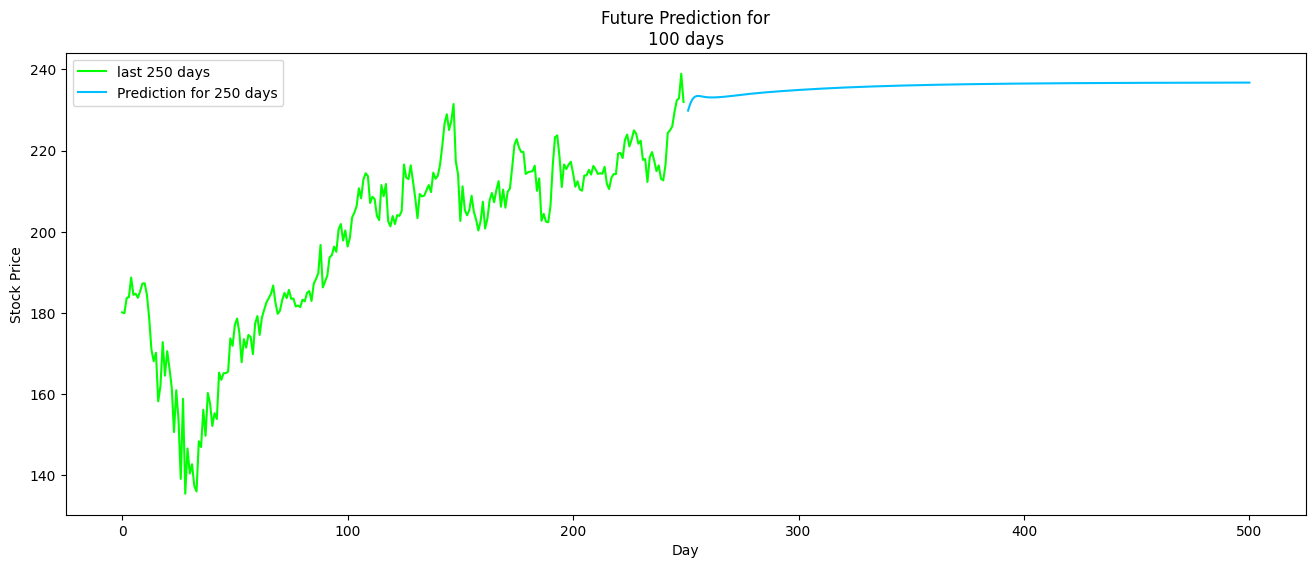

In [42]:
#Plotting of Graphs
x1=np.arange(0,nod)
x2=np.arange(nod+1,2*nod+1)
plt.plot(x1,df2['close'],label='last 250 days',color="lime")
plt.plot(x2,pre_output,label="Prediction for 250 days",color="deepskyblue")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.legend(loc='upper left')
plt.title("Future Prediction for\n100 days")
plt.rcParams['figure.figsize']=(16,6)
plt.show()

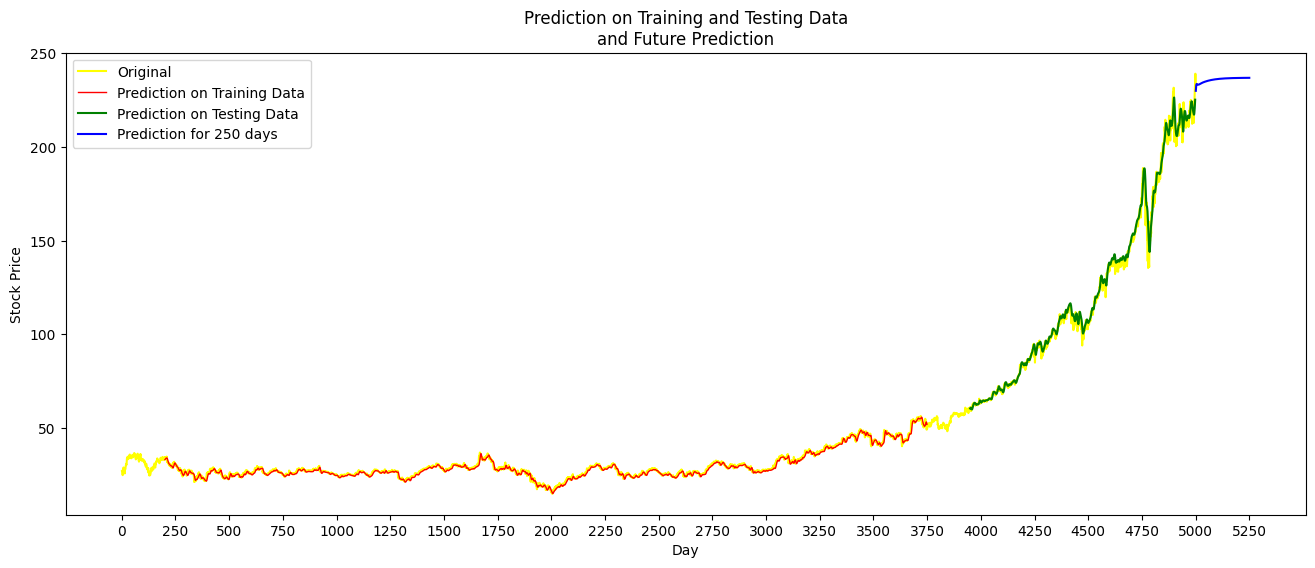

In [43]:
x3=np.arange(1,len(df)+1)
plt.plot(x3,df['close'],label='Original',color="yellow")

x4=np.arange(step+1,step+1+len(y_train))
plt.plot(x4,train_pred,label='Prediction on Training Data',color="red",linewidth="1")

x5_1=1+step+len(y_train)+step
x5_2=x5_1+len(y_test)
x5=np.arange(x5_1,x5_2)
plt.plot(x5,test_pred,label='Prediction on Testing Data',color="green")

x6=np.arange(x3[-1]+1,x3[-1]+1+nod)
plt.plot(x6,pre_output,label="Prediction for 250 days",color="blue")

plt.legend(loc='upper left')
plt.xlabel("Day")
plt.ylabel('Stock Price')
plt.title("Prediction on Training and Testing Data\nand Future Prediction")
x_axis=np.arange(0,len(df)+nod,250)
# x_axis[-1]=5100
x_axis=np.append(x_axis,5250)
plt.xticks(x_axis)
plt.rcParams['figure.figsize']=(16,6)
plt.show()
